In [ ]:
### Simple Difference Gradient and Sobel

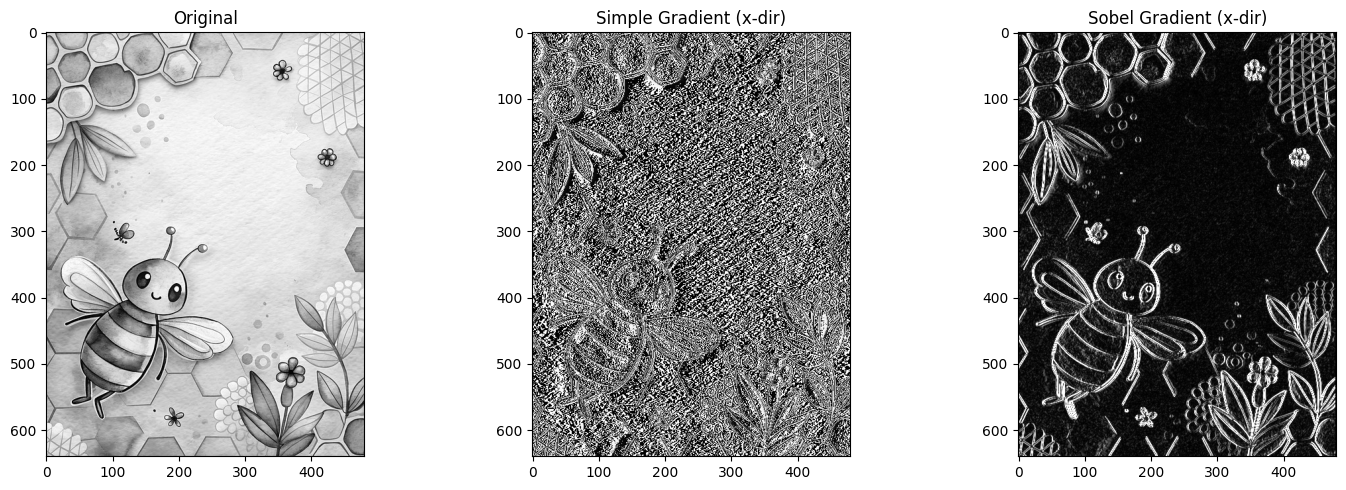

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
img = cv2.imread('bee-8790316_640.jpg', cv2.IMREAD_GRAYSCALE)

# 1. Simple Gradient (using direct pixel subtraction)
simple_grad_x = np.zeros_like(img)
simple_grad_x[:, 1:] = np.abs(img[:, 1:] - img[:, :-1])

# 2. Sobel Gradient (OpenCV built-in)
sobel_grad_x = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_grad_x = np.abs(sobel_grad_x)
sobel_grad_x = np.uint8(np.clip(sobel_grad_x, 0, 255))  # Convert for display

# 🖼️ Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Simple Gradient (x-dir)')
plt.imshow(simple_grad_x, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Gradient (x-dir)')
plt.imshow(sobel_grad_x, cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
### PreWitt Kernels

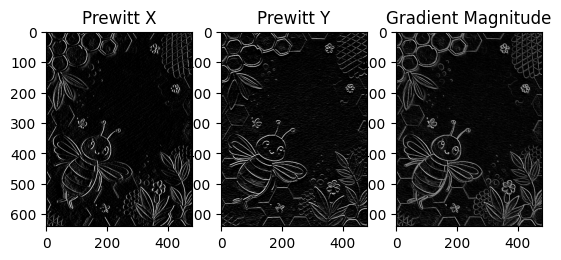

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load grayscale image
img = cv2.imread('bee-8790316_640.jpg', cv2.IMREAD_GRAYSCALE)

# Prewitt kernels
kernelx = np.array([[ -1, 0, 1],
                    [ -1, 0, 1],
                    [ -1, 0, 1]])
kernely = np.array([[ 1,  1,  1],
                    [ 0,  0,  0],
                    [-1, -1, -1]])

# Apply kernels
img_prewittx = cv2.filter2D(img, -1, kernelx)
img_prewitty = cv2.filter2D(img, -1, kernely)
img_prewitt = cv2.magnitude(img_prewittx.astype(np.float32), img_prewitty.astype(np.float32))

# Show
plt.subplot(1,3,1), plt.imshow(img_prewittx, cmap='gray'), plt.title('Prewitt X')
plt.subplot(1,3,2), plt.imshow(img_prewitty, cmap='gray'), plt.title('Prewitt Y')
plt.subplot(1,3,3), plt.imshow(img_prewitt, cmap='gray'), plt.title('Gradient Magnitude')
plt.show()


In [ ]:
## kirsch_kernels

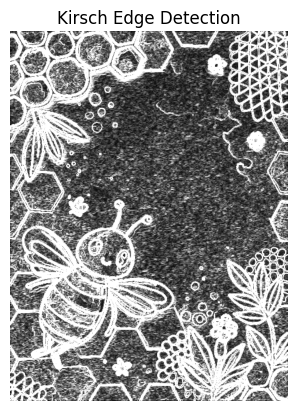

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image in grayscale
img = cv2.imread('bee-8790316_640.jpg', 0)

# Define all 8 Kirsch kernels
kirsch_kernels = [
    np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),  # North
    np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]]),  # NE
    np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),  # NW
    np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),  # South
    np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]]),  # SE
    np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),  # SW
    np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),  # East
    np.array([[-3, -3, -3], [5, 0, 5], [-3, -3, -3]])   # West
]

# Apply all kernels and take maximum response
edges = np.zeros_like(img, dtype=np.float32)
for k in kirsch_kernels:
    filtered = cv2.filter2D(img, -1, k)
    edges = np.maximum(edges, filtered.astype(np.float32))

# Normalize for display
edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX)
edges = edges.astype(np.uint8)

# Show result
plt.imshow(edges, cmap='gray')
plt.title("Kirsch Edge Detection")
plt.axis('off')
plt.show()


In [ ]:
### Line Detection

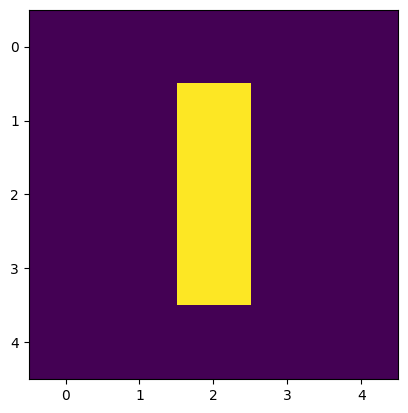

In [8]:
a = np.array([[0,  0,  0,  0,  0],
[0,  0,  1,  0,  0],
[0,  0,  1,  0,  0],
[0,  0, 1,  0,  0],
[0,  0,  0,  0,  0]])

plt.imshow(a)

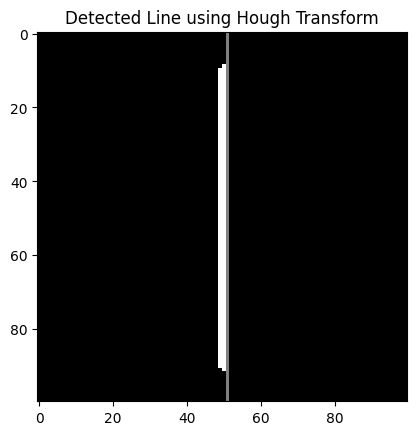

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a simple black image with a white vertical line
img = np.zeros((100, 100), dtype=np.uint8)
cv2.line(img, (50, 10), (50, 90), 255, 2)

# Edge detection (Canny)
edges = cv2.Canny(img, 50, 150)

# Apply Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=80)

# Draw detected line
for rho, theta in lines[:, 0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), 127, 1)

plt.imshow(img, cmap='gray')
plt.title("Detected Line using Hough Transform")
plt.show()
